In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# Reading data

In [295]:
df = pd.read_csv("./Shopping_data.csv")
df = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df['Genre'] = df['Genre'].replace({'Male':1,'Female':0})
df = df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)':'Spending_Score'})
df.describe()
df.head(5)

,Genre,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


##### is there missing data?

In [296]:
df.isna().sum()

Genre             0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

array([[<Axes: title={'center': 'Genre'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Spending_Score'}>]], dtype=object)

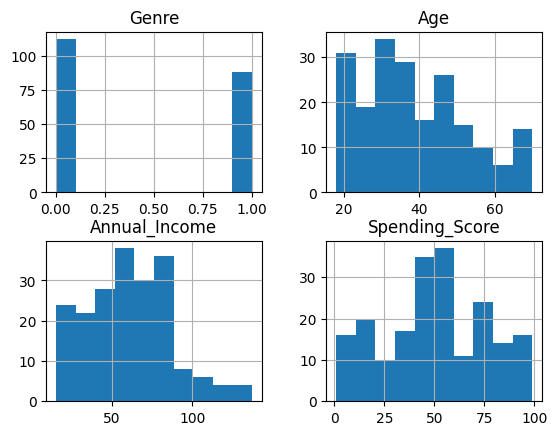

In [297]:
df.hist()

<Axes: xlabel='Age', ylabel='Count'>

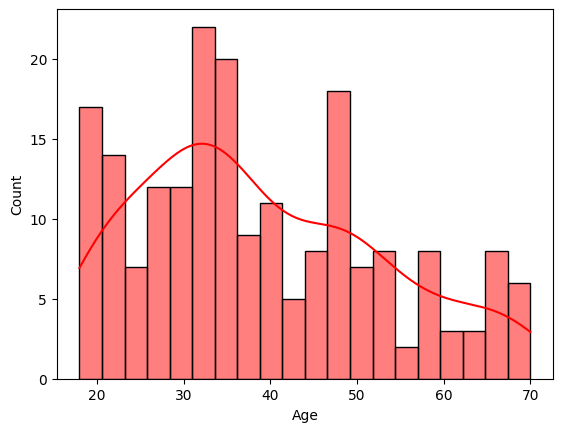

In [298]:
sns.histplot(df['Age'], kde=True, bins=20, color='red')

<Axes: xlabel='Spending_Score', ylabel='Count'>

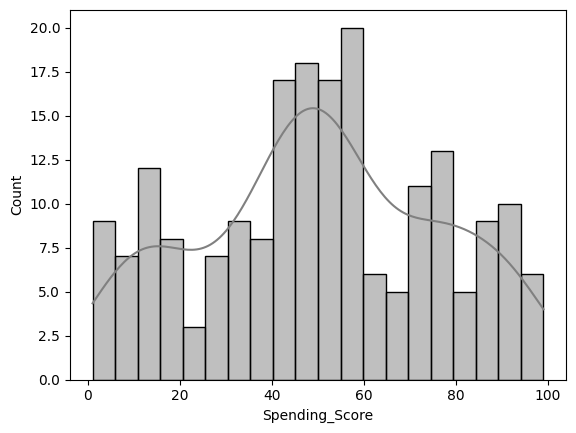

In [299]:
sns.histplot(df['Spending_Score'], kde=True, bins=20, color='grey')

<Axes: xlabel='Spending_Score', ylabel='Count'>

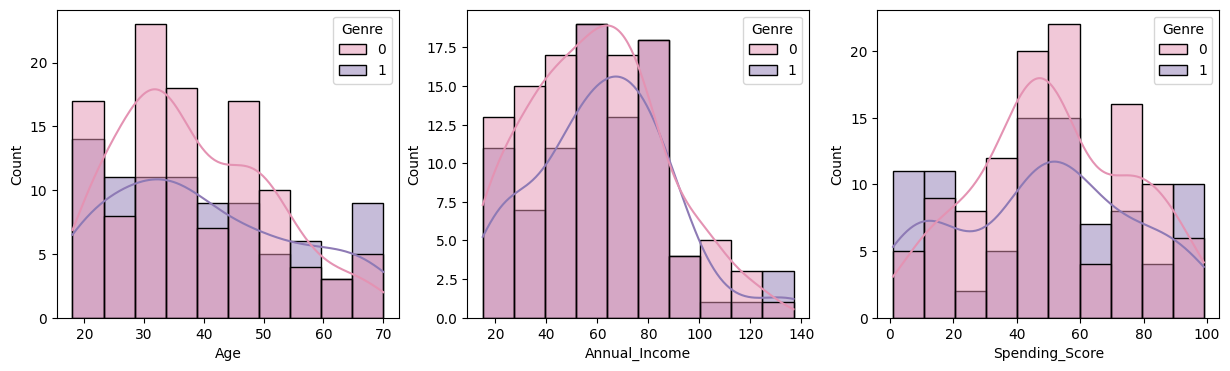

In [300]:
f, axes = plt.subplots(1, 3, figsize=(15,4))

sns.histplot(data=df, x="Age", hue="Genre", kde=True, bins=10, palette=["#E493B3","#8E7AB5"], ax=axes[0])
sns.histplot(data=df, x="Annual_Income", hue="Genre", kde=True, bins=10, palette=["#E493B3","#8E7AB5"], ax=axes[1])
sns.histplot(data=df, x="Spending_Score", hue="Genre", kde=True, bins=10, palette=["#E493B3","#8E7AB5"], ax=axes[2])

##### normalize data:

In [301]:
min_max_scaler = MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head(5)
# df_scaled = df

,Genre,Age,Annual_Income,Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


# Data Visualization

Text(0, 0.5, 'Genre')

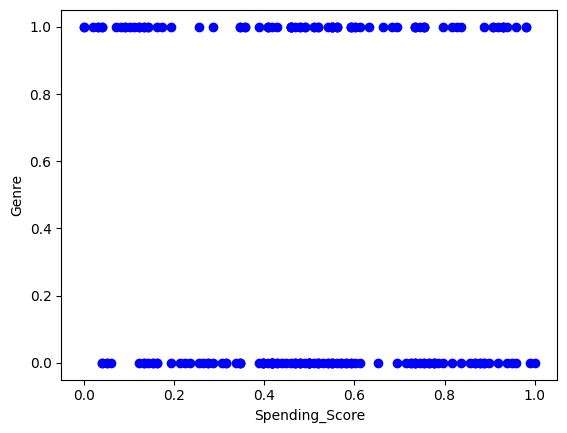

In [302]:
plt.scatter(df_scaled.Spending_Score, df.Genre, color="blue")
plt.xlabel("Spending_Score")
plt.ylabel("Genre")

Text(0, 0.5, 'Annual_Income')

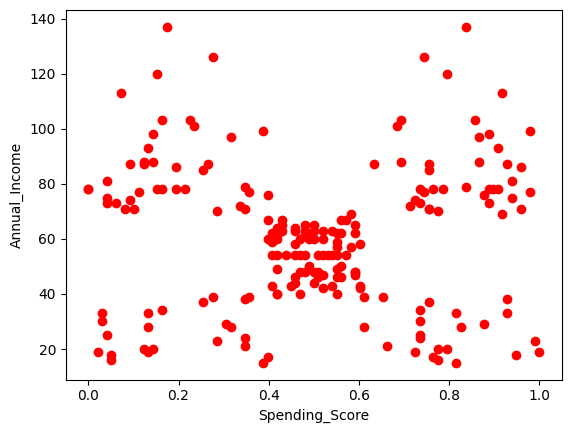

In [303]:
plt.scatter(df_scaled.Spending_Score, df.Annual_Income, color="red")
plt.xlabel("Spending_Score")
plt.ylabel("Annual_Income")

Text(0, 0.5, 'Age')

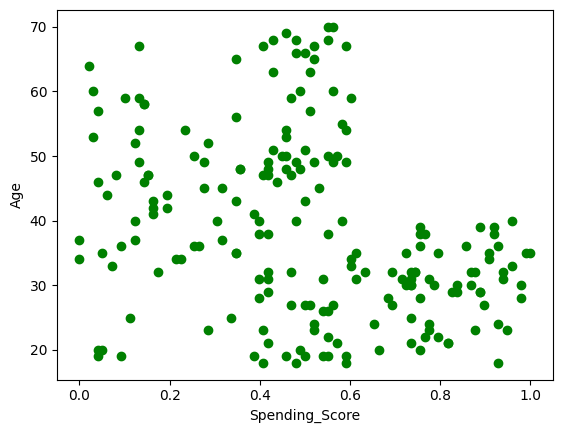

In [304]:
plt.scatter(df_scaled.Spending_Score, df.Age, color="green")
plt.xlabel("Spending_Score")
plt.ylabel("Age")

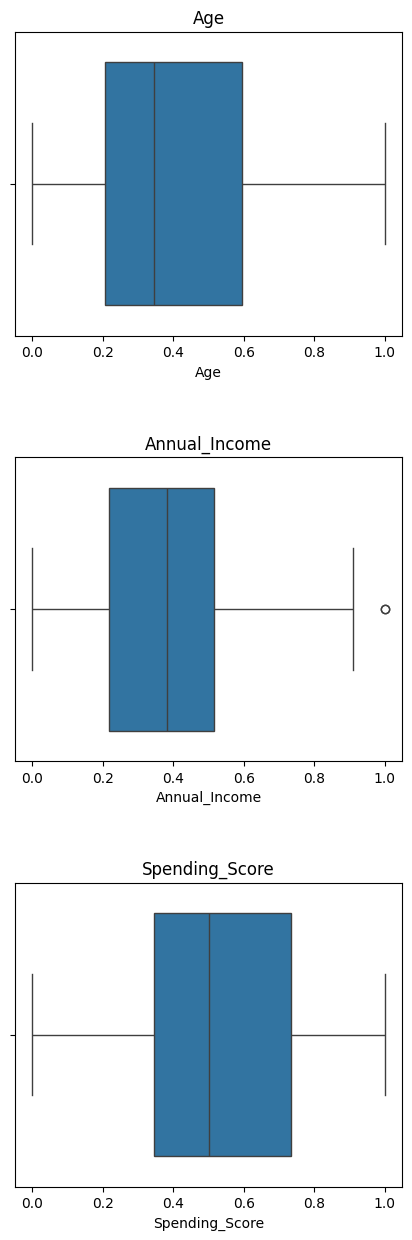

In [305]:
columns = ['Age', 'Annual_Income', 'Spending_Score']
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,15))
fig.subplots_adjust(hspace=0.4)
for i, column in enumerate(columns):
    sns.boxplot(x=column, data=df_scaled, ax=ax[i])
    ax[i].set_title(column)

([<matplotlib.patches.Wedge at 0x1e7cda0eb80>,
 [Text(-0.20611945413751356, 1.080515974257694, ''),
  Text(0.20611945413751367, -1.080515974257694, '')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56%'),
  Text(0.11242879316591654, -0.5893723495951058, '44%')])

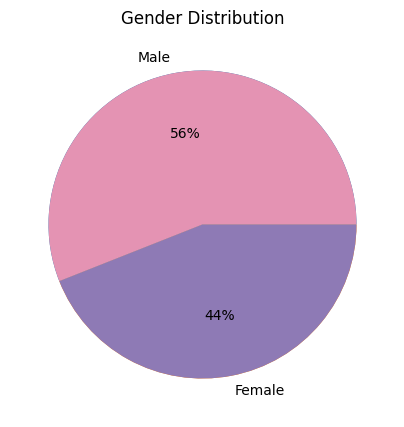

In [306]:
genre_count=df["Genre"].value_counts()
plt.figure(figsize=(5,5))
plt.title("Gender Distribution")
plt.pie(genre_count, labels={"Female", "Male"})
plt.pie(genre_count, autopct="%.0f%%", colors=["#E493B3","#8E7AB5"])

# Applying Model

In [307]:
X = df_scaled[['Genre', 'Age', 'Annual_Income']].values
y = df_scaled[['Spending_Score']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=25)

##### apllying linear regression

In [308]:
model_linear_regression = LinearRegression()
regression = model_linear_regression.fit(X_train,y_train)

In [309]:
predictiion = regression.predict(X_test)
mse_lr = mean_squared_error(y_test, predictiion)
print("Mean Squared Error:", mse_lr)
r2_lr = r2_score(y_test, predictiion)
print("r2 score:", r2_lr)

Mean Squared Error: 0.04023231317790314
r2 score: 0.10540911539200626


##### making it polynomial

In [310]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
# or:
# model_poly_reg = Pipeline([('poly', PolynomialFeatures(degree=3)),
#                 ('linear', LinearRegression(fit_intercept=False))])

In [311]:
model_linear_regression_poly = LinearRegression()
model_linear_regression_poly.fit(X_train_poly,y_train)

LinearRegression()

In [312]:
predictiion_poly = model_linear_regression_poly.predict(X_test_poly)
mse_plr= mean_squared_error(y_test, predictiion_poly)
print("Mean Squared Error:", mse_plr)
r2_plr = r2_score(y_test, predictiion_poly)
print("r2 score:", r2_plr)

Mean Squared Error: 0.0315799244810228
r2 score: 0.29780044084444457


##### apllying Ridge regression

In [313]:
r_reg = Ridge(alpha=.5)
r_reg.fit(X_train_poly,y_train)

Ridge(alpha=0.5)

In [314]:
prediction_ridge = r_reg.predict(X_test_poly)
mse_r_reg = mean_squared_error(y_test, prediction_ridge)
print("Mean Squared Error:", mse_r_reg)
r2_r_reg = r2_score(y_test, prediction_ridge)
print("r2 score:", r2_r_reg)

Mean Squared Error: 0.039766659355758474
r2 score: 0.11576322212286871


##### applying Least Angle Regression(LARS)

In [315]:
LARS = linear_model.LassoLars(alpha=.1)
LARS.fit(X_train_poly,y_train)

LassoLars(alpha=0.1)

In [316]:
prediction_LARS = LARS.predict(X_test_poly)
mse_LARS = mean_squared_error(y_test, prediction_LARS)
print("Mean Squared Error:", mse_LARS)
r2_LARS = r2_score(y_test, prediction_LARS)
print("r2 score:", r2_LARS)

Mean Squared Error: 0.0461809573159621
r2 score: -0.02686274275725653


##### applying Kernel ridge regression (KRR)

In [317]:
krr = KernelRidge()
krr.fit(X_train,y_train)

KernelRidge()

In [318]:
prediction_krr = krr.predict(X_test)
mse_krr = mean_squared_error(y_test, prediction_krr)
print("Mean Squared Error:", mse_krr)
r2_krr = r2_score(y_test, prediction_krr)
print("r2 score:", r2_krr)

Mean Squared Error: 0.09729518848038968
r2 score: -1.1634199442098714


In [319]:
model_poly_krr = Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', KernelRidge())])
model_poly_krr.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', KernelRidge())])

In [320]:
prediction_krr_poly = model_poly_krr.predict(X_test)
mse_pkrr = mean_squared_error(y_test, prediction_krr_poly)
print("Mean Squared Error:", mse_pkrr)
r2_pkrr = r2_score(y_test, prediction_krr_poly)
print("r2 score:", r2_pkrr)

Mean Squared Error: 0.0395446097550319
r2 score: 0.12070063518839269


##### applying SGD Regressor

In [321]:
sgd = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000))
sgd.fit(X_train,y_train)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [322]:
prediction_sgd = sgd.predict(X_test)
mse_sgd = mean_squared_error(y_test, prediction_sgd)
print("Mean Squared Error:", mse_sgd)
r2_sgd = r2_score(y_test, prediction_sgd)
print("r2 score:", r2_sgd)

Mean Squared Error: 0.04079763761251599
r2 score: 0.09283876966481641


##### Gaussian Regressor

In [354]:
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X_train,y_train)

GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         random_state=0)

In [355]:
prediction_gpr = gpr.predict(X_test)
mse_gpr = mean_squared_error(y_test, prediction_gpr)
print("Mean Squared Error:", mse_gpr)
r2_gpr = r2_score(y_test, prediction_gpr)
print("r2 score:", r2_gpr)

Mean Squared Error: 0.046311670309070484
r2 score: -0.029769228686055138


# results

In [353]:
method = ["Linear Regression", "polynomial Linear Regression","Ridge regression","Least Angle Regression(LARS)","Kernel ridge regression (KRR)","polynomial Kernel ridge regression (KRR)","SGD Regressor","Gaussian Regressor"]
mses = [mse_lr,mse_plr,mse_r_reg,mse_LARS,mse_krr,mse_pkrr,mse_sgd,mse_gpr]
r2 = [r2_lr,r2_plr,r2_r_reg,r2_LARS,r2_krr,r2_pkrr,r2_sgd,r2_gpr]
table = pd.DataFrame({
    "Method": method,
    "MSE": mses,
    "r2score": r2
})
display(table)

,Method,MSE,r2score
0,Linear Regression,0.040232,0.105409
1,polynomial Linear Regression,0.031580,0.297800
2,Ridge regression,0.039767,0.115763
3,Least Angle Regression(LARS),0.046181,-0.026863
4,Kernel ridge regression (KRR),0.097295,-1.163420
5,polynomial Kernel ridge regression (KRR),0.039545,0.120701
6,SGD Regressor,0.046312,-0.029769
7,Gaussian Regressor,0.046312,-0.029769
